In [165]:
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [166]:
SFU_2013to2024 = pd.read_excel("AIESEC_SFU_data_export.xlsx")
SFU_2013to2024.head()


,Backgrounds,Signed up,Applied,Accepted,Approved,Realized,Finished,Completed,Gender,GPA,Funding,Length of Exchange,Motivation,Number of Destinations,English Proficiency,Prior International Experience,SFU Campus,Co-op Participation
0,Business administration,292,916,114,79,72,0,1,Male,3.74,Yes,10,Motivation,5,45,No,Vancouver,Yes
1,Marketing,74,377,38,28,28,0,0,Male,0.99,No,6,Cultural,4,86,Yes,Burnaby,Yes
2,Communication & journalism,69,251,36,22,21,0,0,Female,2.70,Yes,7,Career,3,19,Yes,Vancouver,No
3,Arts,47,147,32,17,16,0,0,Male,1.65,No,9,Cultural,1,43,Yes,Surrey,No
4,Economics,65,317,26,16,14,0,1,Female,4.26,No,1,Career,5,41,No,Vancouver,Yes


In [167]:
SFU_2013to2024["Applied to Accepted Drop-Off"] = 1 - (SFU_2013to2024["Accepted"] / SFU_2013to2024["Applied"])
SFU_2013to2024["Accepted to Approved Drop-Off"] = 1 - (SFU_2013to2024["Approved"] / SFU_2013to2024["Accepted"])
SFU_2013to2024["Approved to Realized Drop-Off"] = 1 - (SFU_2013to2024["Realized"] / SFU_2013to2024["Approved"])
SFU_2013to2024["Realized to Completed Drop-Off"] = 1 - (SFU_2013to2024["Completed"] / SFU_2013to2024["Realized"])


In [168]:
import plotly.graph_objects as go

# Define stages and values
stages = ["Signed Up", "Applied", "Accepted", "Approved", "Realized", "Completed"]
values = [
    SFU_2013to2024["Signed up"].sum(),
    SFU_2013to2024["Applied"].sum(),
    SFU_2013to2024["Accepted"].sum(),
    SFU_2013to2024["Approved"].sum(),
    SFU_2013to2024["Realized"].sum(),
    SFU_2013to2024["Completed"].sum(),
]

# Create a figure and add a funnel trace
fig = go.Figure(go.Funnel(y=stages, x=values, textinfo="value+percent initial"))

# Update the layout
fig.update_layout(title="Drop-Off Funnel for AIESEC SFU Exchange Program")

# Show the figure
fig.show()


High Drop-Off in Early Stages (e.g., Signed up -> Applied): If a lot of people sign up but few proceed to apply, it suggests that there may be issues with the application process itself—perhaps it is too complicated, too time-consuming, or not well communicated.

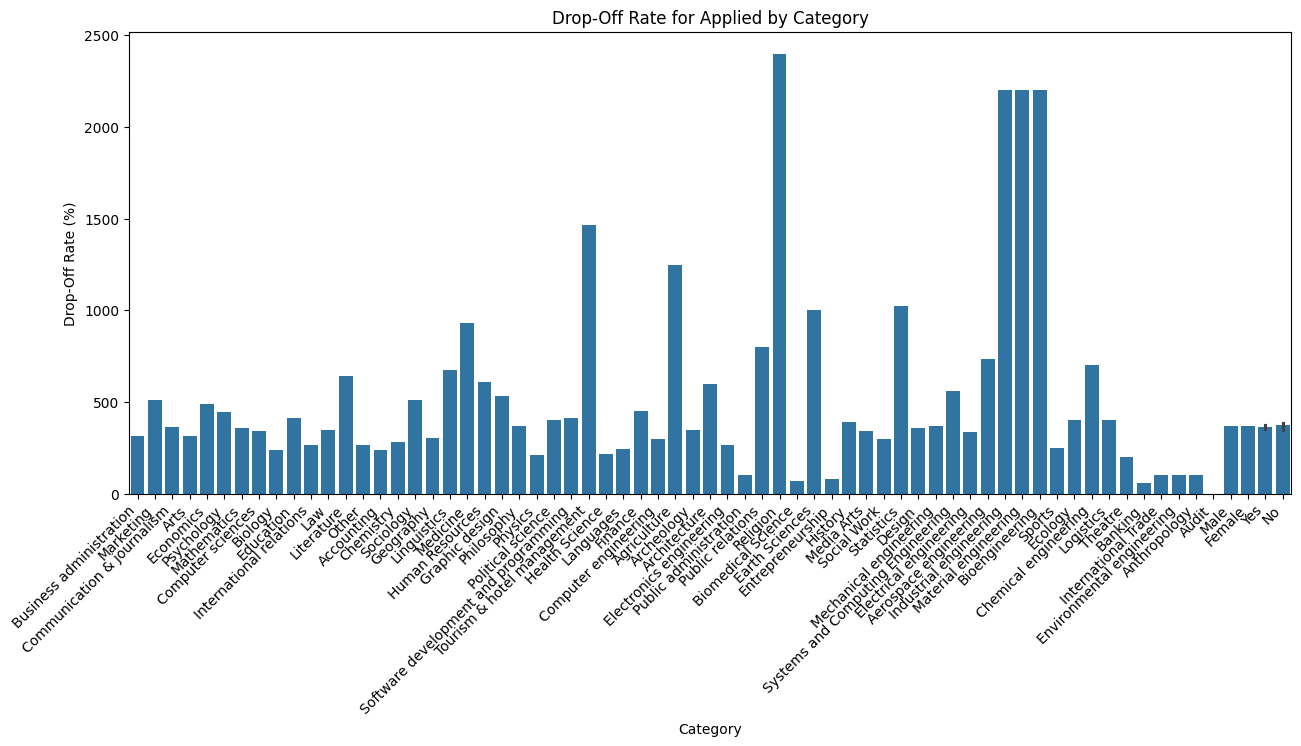

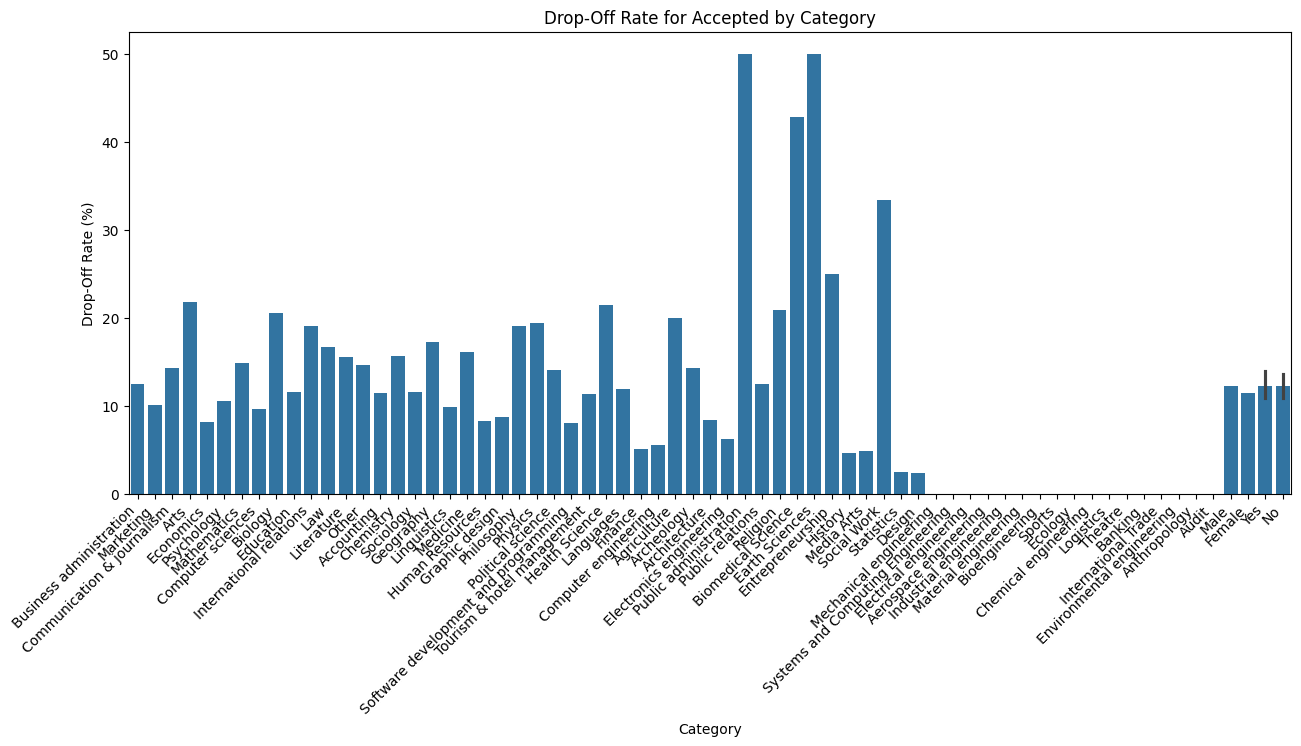

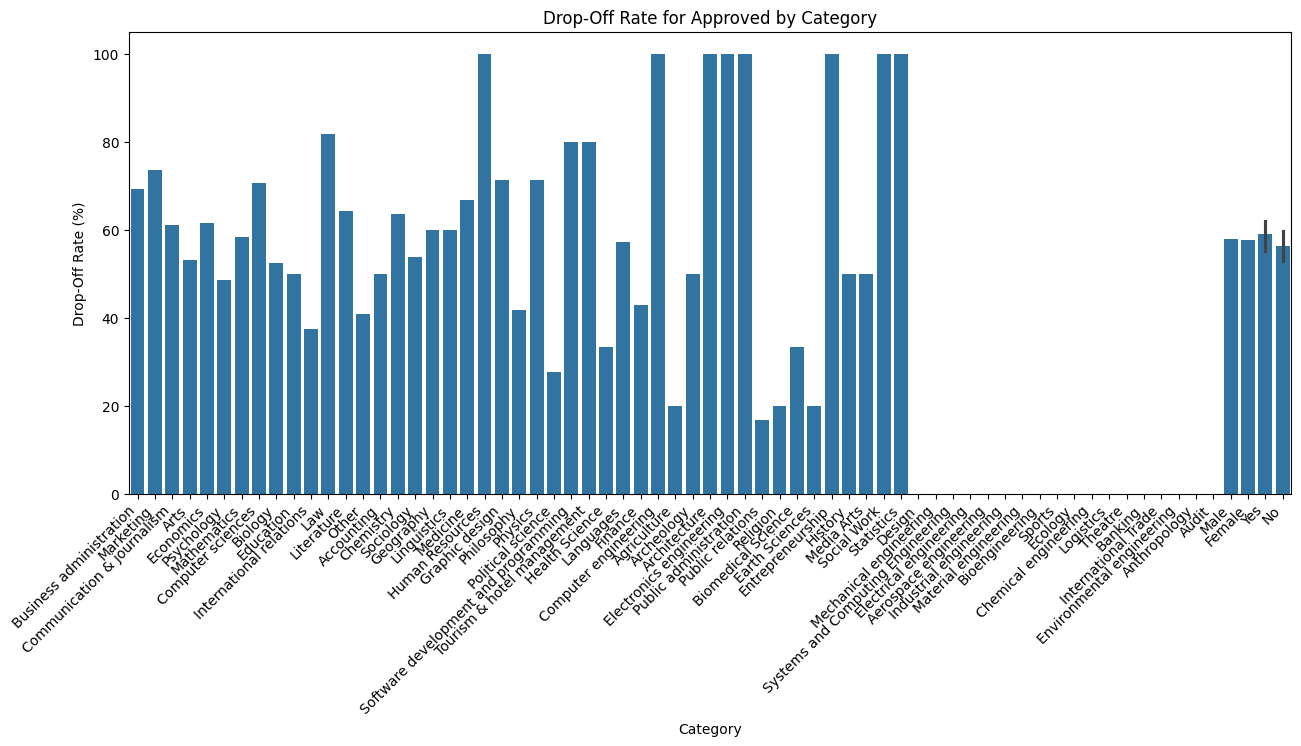

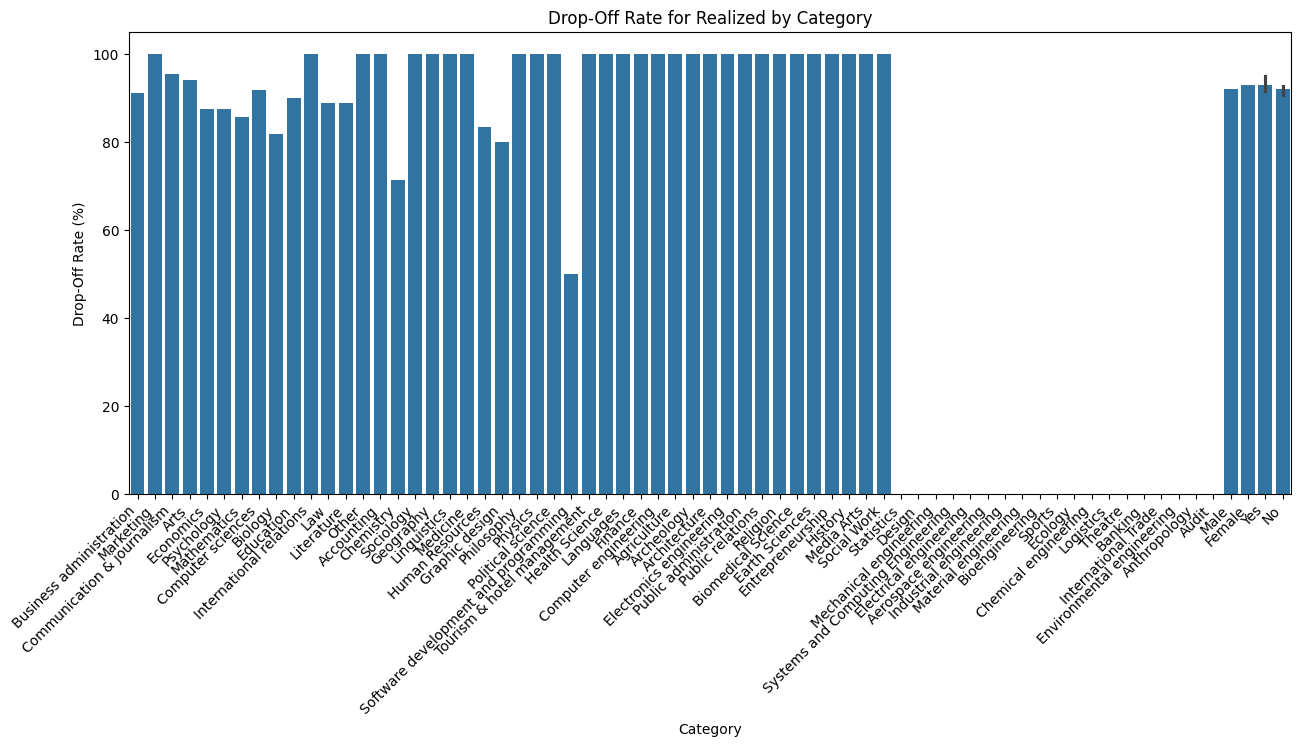

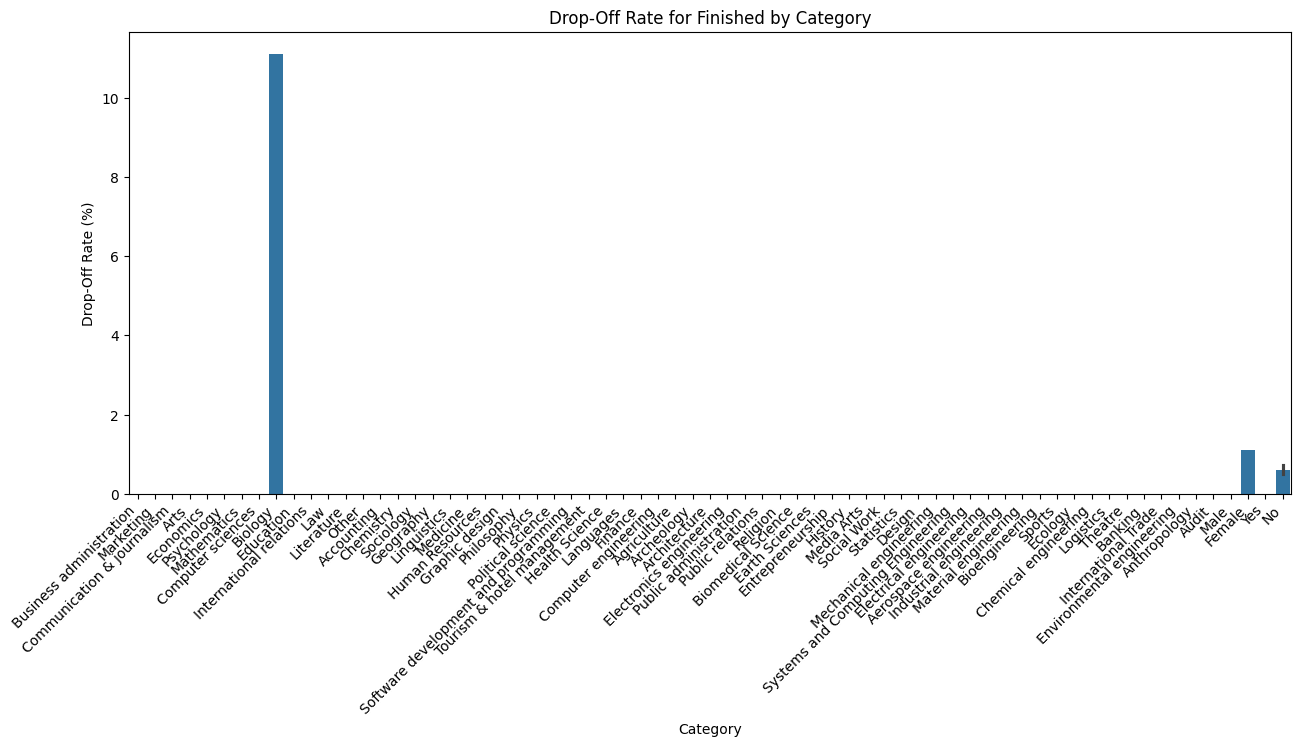

In [ ]:
# Create a new DataFrame to hold drop-off rates by category
drop_off_data_list = []

# Function to calculate drop-off rates by category
# Function to calculate drop-off rates by category
def calculate_drop_off(df, category_col):
    drop_off_rates = []
    
    # Loop through unique values in the category column
    for category in df[category_col].unique():
        subset = df[df[category_col] == category]
        
        # Calculate the drop-off rates for each stage, ensuring we handle divisions by zero
        signed_up = subset["Signed up"].sum()
        applied = subset["Applied"].sum()
        accepted = subset["Accepted"].sum()
        approved = subset["Approved"].sum()
        realized = subset["Realized"].sum()
        finished = subset["Finished"].sum()
        completed = subset["Completed"].sum()

        # Safe calculation of drop-off rates (handling division by zero)
        applied_rate = (applied / signed_up * 100) if signed_up > 0 else 0
        accepted_rate = (accepted / applied * 100) if applied > 0 else 0
        approved_rate = (approved / accepted * 100) if accepted > 0 else 0
        realized_rate = (realized / approved * 100) if approved > 0 else 0
        finished_rate = (finished / realized * 100) if realized > 0 else 0
        completed_rate = (completed / finished * 100) if finished > 0 else 0

        # Append the "Signed up" count and drop-off rates
        drop_off_rates.append([category, signed_up, applied_rate, accepted_rate, approved_rate, realized_rate, finished_rate, completed_rate])
    
    return drop_off_rates


# Loop through categories and calculate drop-off rates
categories = ['Backgrounds', 'Gender', 'Funding', 'Prior International Experience', 'Co-op Participation']
for category in categories:
    # Calculate drop-off rates for the current category
    category_data = pd.DataFrame(calculate_drop_off(SFU_2013to2024, category),
                                 columns=["Category", "Signed up", "Applied", "Accepted", "Approved", "Realized", "Finished", "Completed"])
    
    # Append to list for later concatenation
    drop_off_data_list.append(category_data)

# Concatenate all data once
drop_off_data = pd.concat(drop_off_data_list, ignore_index=True)

# Visualize drop-off rates by category
def plot_drop_off_chart(drop_off_data, stage):
    plt.figure(figsize=(15, 6))
    sns.barplot(x="Category", y=stage, data=drop_off_data)
    plt.title(f'Drop-Off Rate for {stage} by Category')
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Drop-Off Rate (%)")
    plt.show()

# Plot drop-off rates for each stage
stages = ["Applied", "Accepted", "Approved", "Realized", "Finished", "Completed"]
for stage in stages:
    plot_drop_off_chart(drop_off_data, stage)

demographic breakdown

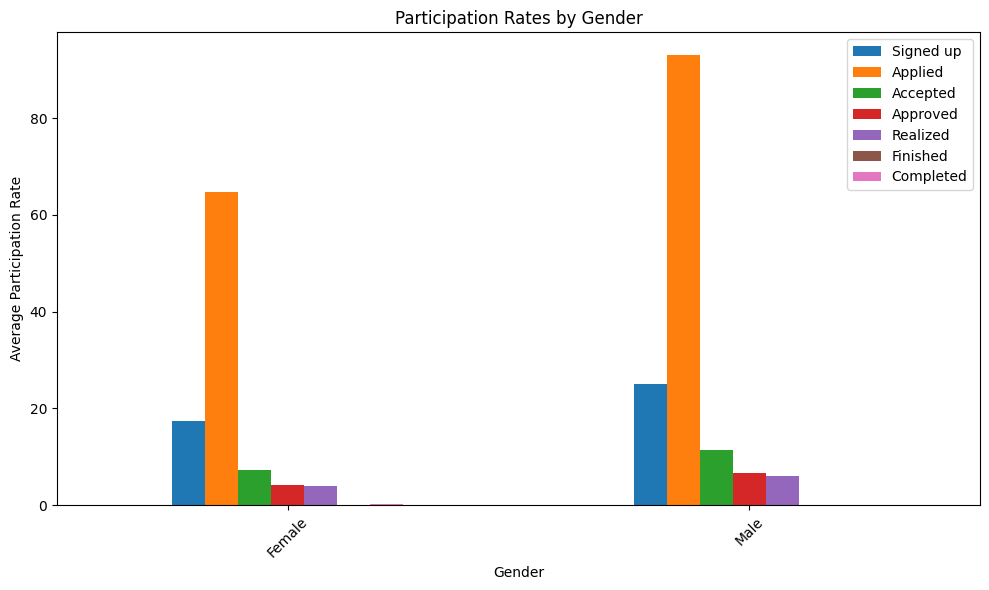

C:\Users\melvi\AppData\Local\Temp\ipykernel_95468\249844564.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



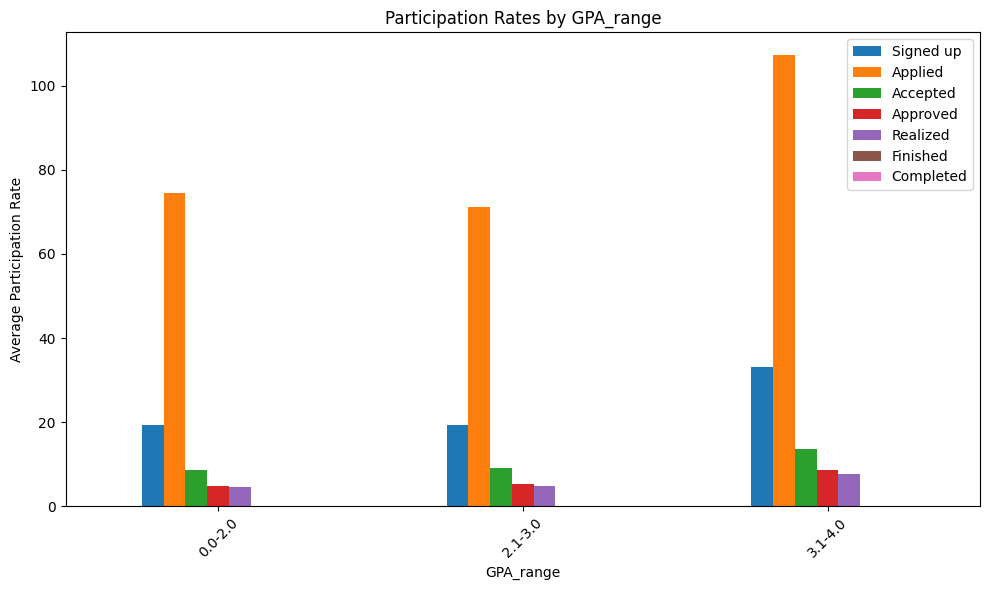

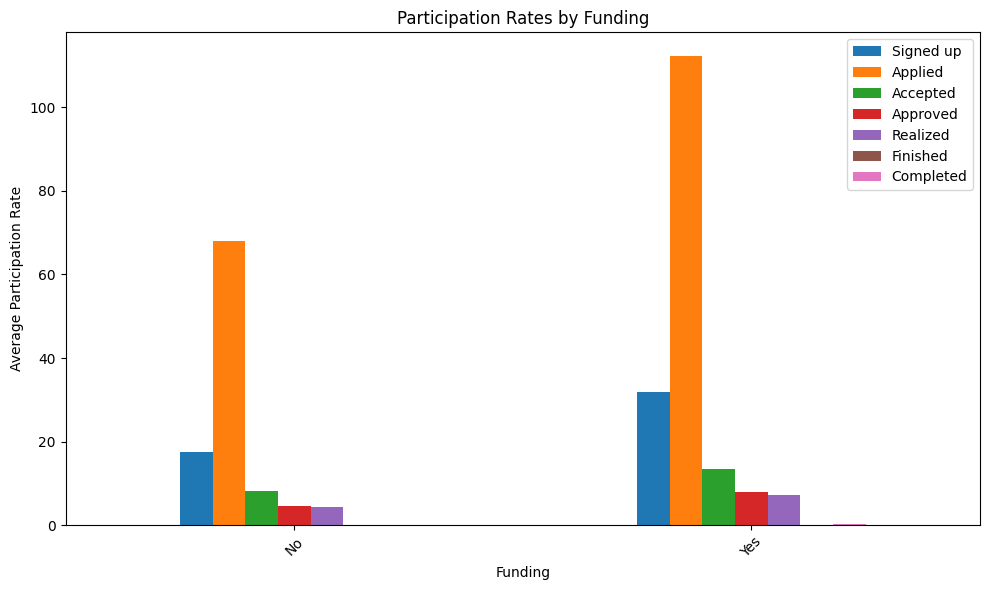

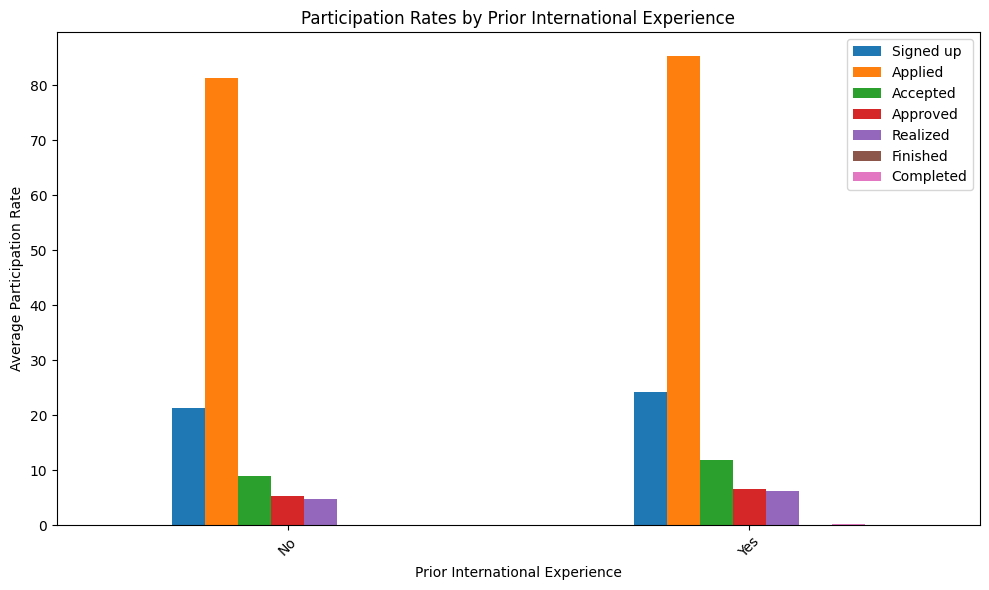

In [ ]:
df = SFU_2013to2024

# Define a function to create bar plots comparing participation by demographic
def plot_participation(df, demographic_column):
    participation_columns = ['Signed up', 'Applied', 'Accepted', 'Approved', 'Realized', 'Finished', 'Completed']
    df_participation = df.groupby(demographic_column)[participation_columns].mean()

    # Plot the data
    df_participation.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Participation Rates by {demographic_column}')
    plt.ylabel('Average Participation Rate')
    plt.xlabel(demographic_column)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Gender-based participation visualization
plot_participation(df, 'Gender')

# GPA-based participation visualization (Example of GPA ranges)
df['GPA_range'] = pd.cut(df['GPA'], bins=[0, 2.0, 3.0, 4.0], labels=['0.0-2.0', '2.1-3.0', '3.1-4.0'])
plot_participation(df, 'GPA_range')

# Funding-based participation visualization
plot_participation(df, 'Funding')

# Prior International Experience-based participation
plot_participation(df, 'Prior International Experience')

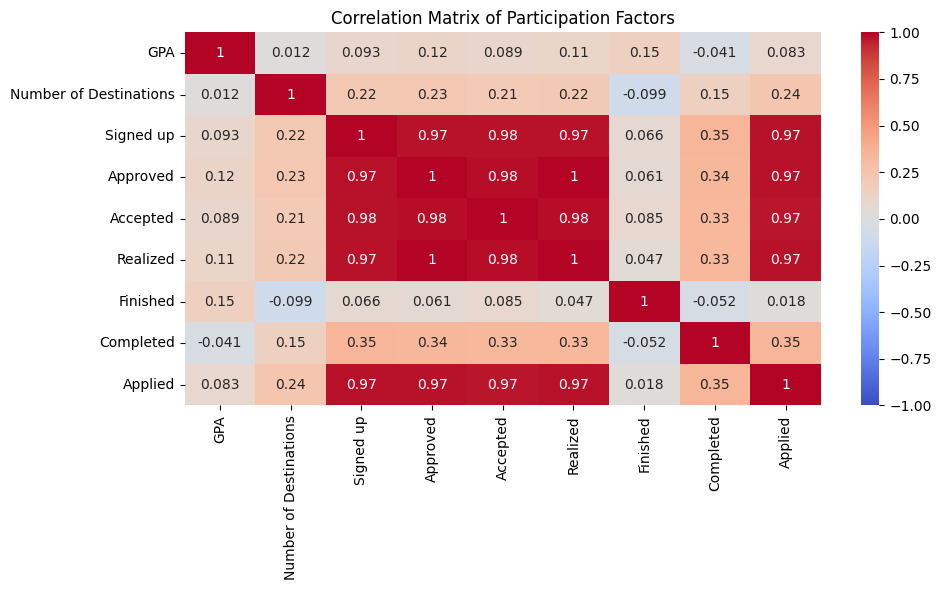

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate correlation matrix for continuous variables
correlation_matrix = df[['GPA', 'Number of Destinations', 'Signed up', 'Approved', 'Accepted','Realized', 'Finished', 'Completed', 'Applied', ]].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Participation Factors')
plt.tight_layout()
plt.show()


In [ ]:
# Handle missing values (if necessary)
df = df.dropna(subset=['GPA', 'Motivation', 'Funding', 'Applied'])

# Encode categorical columns (Motivation type)
label_encoder = LabelEncoder()
df['Motivation_encoded'] = label_encoder.fit_transform(df['Motivation'])

# Encode Funding column if it's categorical
df['Funding_encoded'] = label_encoder.fit_transform(df['Funding'])

# Define features (predictors) and target variable (Applied)
X = df[['GPA', 'Number of Destinations', 'Motivation_encoded', 'Funding_encoded']]  # Add other factors if necessary
y = df['Applied']  # Target: whether the student applied (0 = No, 1 = Yes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.84
Confusion Matrix:
[[16  0]
 [ 3  0]]
